# Assignment 3 by Gabriel Chernitsky


In [1]:
'''Import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

In [2]:
'''Load data'''
ziptest = np.genfromtxt('data/ziptest.csv')
ziptrain =np.genfromtxt('data/ziptrain.csv')

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 


In [116]:
ziptrain2=ziptrain[ziptrain[:, 0] == 2]
ziptrain7=ziptrain[ziptrain[:, 0] == 7]

# Combine 2's and 7's with the numpy vstack function.
ziptrain27 = np.vstack([ziptrain2, ziptrain7])


- Project ziprain onto two principal components


In [117]:
pca = PCA(n_components=2)
# Remember that the first column in our data is the label (our y) so we only project our features
# onto PC space... This just means we run pca.fit on everything but the first column of our data.
pca.fit(ziptrain27[:, 1:])
Z = pca.transform(ziptrain27[:,1:])
# Z is the transformed ziptrain27 dataset, we went from having 256 features to just 2!

# We're going to be using logistic regression soon so we have to turn our labels (2 and 7)
# into a binary.
ytrain =  (ziptrain27[:,0]== 2).astype(int)

- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

No handles with labels found to put in legend.


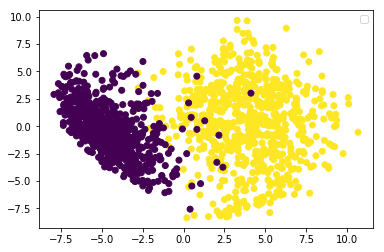

In [123]:
plt.scatter(Z[:,0],Z[:,1],c=ytrain)
plt.legend()
plt.show()

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).


In [120]:
from sklearn.metrics import confusion_matrix


#Find the test data we need
ziptest2=ziptest[ziptest[:, 0] == 2]
ziptest7=ziptest[ziptest[:, 0] == 7]

ziptest27 = np.vstack([ziptest2, ziptest7])

Ztest = pca.transform(ziptest27[:,1:])
ytest = (ziptest27[:,0]== 2).astype(int)

lr = LogisticRegression()
lr.fit(Z,ytrain)
y_pred = lr.predict(Ztest)


- Build the confusion matrix on ziptest and check how well the model works on the test data.


In [94]:
print('Confusion Matrix \n',confusion_matrix(ytest,lr.predict(Ztest)),
      '\n\n\n',
      'Accuracy Score \n',
      lr.score(Ztest,ytest))

Confusion Matrix 
 [[140   7]
 [  5 193]] 


 Accuracy Score 
 0.9652173913043478


96.5% accuracy! Not bad!

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.


In [121]:
'''Lets iterate over the number of principal components (PCs)
   with the help of a for-loop.

'''

for m in range(2,15):
    pca = PCA(n_components= m)

    Z = pca.fit_transform(ziptrain27[:,1:])
    ytrain =  (ziptrain27[:,0]== 2).astype(int)

    Ztest = pca.transform(ziptest27[:,1:])
    ytest = (ziptest27[:,0]== 2).astype(int)

    lr = LogisticRegression()
    lr.fit(Z,ytrain)
    lr.predict(Ztest)
    print('{} components, score = '.format(m),lr.score(Ztest,ytest))

2 components, score =  0.9652173913043478
3 components, score =  0.9652173913043478
4 components, score =  0.9710144927536232
5 components, score =  0.9739130434782609
6 components, score =  0.9768115942028985
7 components, score =  0.9768115942028985
8 components, score =  0.9739130434782609
9 components, score =  0.9739130434782609
10 components, score =  0.9739130434782609
11 components, score =  0.9739130434782609
12 components, score =  0.9768115942028985
13 components, score =  0.9797101449275363
14 components, score =  0.9797101449275363


- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.


Based on the cell above, the accuracy plateaus at 11 principal components. 
If you explore the number of components further, you may see that the 
accuracy still increases as the number of components increases but it it
only increases marginally.



# 3-Differentiate all digits 

In [124]:
#Let's use more standard notation for the train/test sets.
X_train = ziptrain[:,1:]
y_train = ziptrain[:,0]
X_test = ziptest[:,1:]
y_test = ziptest[:,0]


- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.


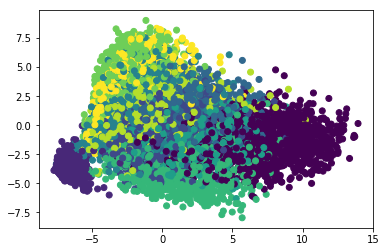

In [125]:
'''First plot all numbers in a 2 PC space'''

pca = PCA(n_components=2)
Z_train = pca.fit_transform(X_train)
plt.scatter(Z_train[:,0],Z_train[:,1],c = y_train)
plt.show()

- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain


In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[342,   0,   0,   4,   3,   1,   5,   0,   3,   1],
       [  0, 251,   0,   2,   5,   0,   3,   0,   1,   2],
       [  7,   2, 157,   4,  12,   2,   1,   1,  12,   0],
       [  3,   0,   3, 142,   3,   9,   0,   1,   4,   1],
       [  1,   4,   6,   0, 174,   0,   2,   2,   1,  10],
       [  6,   0,   0,  16,   3, 125,   0,   0,   5,   5],
       [  1,   0,   3,   0,   3,   3, 157,   0,   3,   0],
       [  0,   1,   0,   2,   7,   0,   0, 129,   1,   7],
       [  5,   0,   2,  11,   7,   4,   0,   0, 135,   2],
       [  0,   0,   0,   0,   4,   0,   0,   5,   3, 165]], dtype=int64)

In [99]:
# Footnote: Here we have an unusual confusion matrix: it is 10 by 10!
# We're used to seeing the confusion matrices from binary classifiers which are 2 by 2.
# Every diagonal entry on this huge matrix tells you the number of times a particular label
# was predicted correctly (first diagonal is the zero label, second is the one, third is
# two and so on). The entries that are off the diagonal tell you how many times a particular class
# was mis-labelled as another class.

# It's hard to look at large confusion matrices and get a quantitive idea of how good
# your predictor is, so we can use metrics like accuracy to inform us about our predictor
# with simple numbers

In [103]:
lda.score(X_test,y_test)

0.885401096163428

In [ ]:
#The score is 88% , that gives us a much clearer picture than just staring at the matrix.
# 88% accuracy isn't bad at all considering we're trying to use linear discriminant to
# tell apart 10 different numbers.

- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


In [104]:
''' What's the best number of PCs? There's many metrics we can use to compare
    models wit different number of PCs, but lets just see how the accuracy
    improves as we increase the number of PCs.

'''

#Let's create a loop that will transform the data to "m" components.   
#At every iteration the number of components increases by 2.


score_list = []
for m in range(2,256,2):
    pca = PCA(n_components=m)
    #the fit_transform method lets you fit and project your training set
    #onto PCA space in a single step.
    Z_train = pca.fit_transform(X_train)
    Z_test = pca.transform(X_test)
    lda = LinearDiscriminantAnalysis()
    lda.fit(Z_train,y_train)
    y_pred = lda.predict(Z_test)
    #Get accuracy score
    s = lda.score(Z_test,y_test)
    #Save scores onto a list
    score_list.append(s)


Text(0.5,1,'Accuracy Score vs Number of PCs')

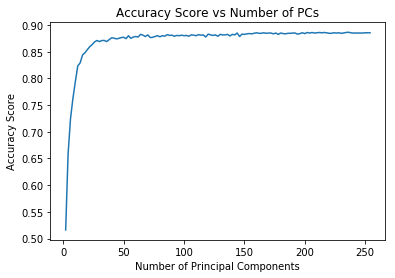

In [105]:
#Don't forget to label your graphs! A graph without labels is a bad graph!
plt.plot(np.arange(2,256,2),score_list)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Principal Components')
plt.title('Accuracy Score vs Number of PCs')

Lets take a closer look at the graph, over a the part where it plateaus.

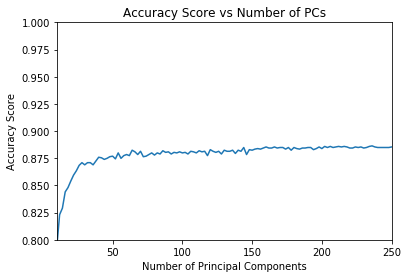

In [110]:
plt.plot(np.arange(2,256,2),score_list)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Principal Components')
plt.title('Accuracy Score vs Number of PCs')
plt.xlim(10,250)
plt.ylim(.8,1)
plt.show()

Observing the graph above, we note that the accuracy doesn't
improve significantly past 50 or so PCs. We can save a lot of 
computing time by reducing our data to 50 PCs, that's a fifth
of the featues of the original data set.

If you want to be more precise with your choise of m, you can
try finding the first maximum or the point where the rate of change
falls below some small percentage. There's many ways to explore the
data, you can even look at other metrics such as the explained variance.

Lets stick to 50 PCs, our accuracy then is 87.5%, just 1% shy of our
accuracy when using the raw data. Not bad at all.
